In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_call = pd.read_csv('/home/darshan/Documents/22-Nov-Data/outreach_call_dumps.csv', low_memory=False)

df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37092 entries, 0 to 37091
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     37092 non-null  object 
 1   state                  37092 non-null  object 
 2   created_at             37092 non-null  object 
 3   answered_at            12741 non-null  object 
 4   completed_at           37092 non-null  object 
 5   duration_in_seconds    12778 non-null  float64
 6   direction              37092 non-null  object 
 7   from                   16579 non-null  object 
 8   to                     36892 non-null  object 
 9   outcome                0 non-null      float64
 10  purpose                23542 non-null  object 
 11  disposition            37092 non-null  object 
 12  note                   13824 non-null  object 
 13  prospect_id            36700 non-null  float64
 14  prospect_first_name    36697 non-null  object 
 15  pr

In [6]:
df_call_req_cl = df_call[[
                            'state',
                            'created_at',
                            'answered_at',
                            'completed_at',
                            'duration_in_seconds',
                            'direction',
                            'purpose',
                            'disposition',
                            'prospect_email',
                            'prospect_owner_id',
                            'prospect_owner_name',
                            'account_id',
                            'sequence_id',
                            'sequence_name',
                            'sequence_step_number',
                            'unified_account_id'
                        ]]
df_call_req_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37092 entries, 0 to 37091
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 37092 non-null  object 
 1   created_at            37092 non-null  object 
 2   answered_at           12741 non-null  object 
 3   completed_at          37092 non-null  object 
 4   duration_in_seconds   12778 non-null  float64
 5   direction             37092 non-null  object 
 6   purpose               23542 non-null  object 
 7   disposition           37092 non-null  object 
 8   prospect_email        36668 non-null  object 
 9   prospect_owner_id     36691 non-null  float64
 10  prospect_owner_name   36691 non-null  object 
 11  account_id            14071 non-null  float64
 12  sequence_id           30436 non-null  float64
 13  sequence_name         30436 non-null  object 
 14  sequence_step_number  30212 non-null  float64
 15  unified_account_id 

In [7]:
# Group by 'Prospect Email' and count unique 'Account Id' for each email
email_account_counts = (
    df_call_req_cl.groupby('prospect_email')['unified_account_id']
    .nunique()
    .reset_index(name='unique_account_count')
)

# Filter rows where unique_account_count >= 2
emails_with_multiple_accounts = email_account_counts[email_account_counts['unique_account_count'] >= 2]

# Count the number of such emails
count_of_emails = emails_with_multiple_accounts.shape[0]

print(f"Number of Prospect Emails with 2 or more unique Account Ids: {count_of_emails}")

Number of Prospect Emails with 2 or more unique Account Ids: 6


In [8]:
# Count null or empty emails
null_or_empty_emails = df_call_req_cl['prospect_email'].isna().sum()

print(f"Number of Prospect Emails that are null or empty: {null_or_empty_emails}")

Number of Prospect Emails that are null or empty: 424


In [9]:
# Count null or unified_account_id 
null_or_empty_acc_id = df_call_req_cl['unified_account_id'].isna().sum()

print(f"Number of null_or_empty_acc_id that are null or empty: {null_or_empty_acc_id}")

Number of null_or_empty_acc_id that are null or empty: 18665


In [10]:
# Filter rows where Account Id is null
no_account_details = df_call_req_cl[df_call_req_cl['unified_account_id'].isna()]

# Count null or empty emails in these rows
null_emails_no_account = no_account_details['prospect_email'].isna().sum()

# Count non-null emails in these rows
not_null_emails_no_account = no_account_details['prospect_email'].notna().sum()

print(f"Number of null Prospect Emails without Account Id: {null_emails_no_account}")
print(f"Number of non-null Prospect Emails without Account Id: {not_null_emails_no_account}")


Number of null Prospect Emails without Account Id: 411
Number of non-null Prospect Emails without Account Id: 18254


In [8]:
# Filter rows where 'Prospect Email' is null or empty
empty_email_data = df_call_req_cl[df_call_req_cl['Prospect Email'].isna()]

# Count the values in the 'Disposition' column for the filtered rows
disposition_counts = empty_email_data['Disposition'].value_counts()

print("Disposition counts for rows with empty Prospect Email:")
print(disposition_counts)

Disposition counts for rows with empty Prospect Email:
Disposition
CC – Convo: In Progress / Follow Up (Create Manual Task)    176
CC – Convo: Not Interested/Unqualified                      118
CC – Convo: Meeting Set / Sale for Upsell                    86
 CC- Convo: Continue                                         33
CC – Convo: Not Now Nurture                                  24
CC – Convo: Referral                                          8
Discovery Call                                                1
Name: count, dtype: int64


In [9]:
# Set 0 in 'Duration in Seconds' where the value is NaN using .loc to avoid SettingWithCopyWarning
df_call_req_cl.loc[:, 'Duration in Seconds'] = df_call_req_cl['Duration in Seconds'].fillna(0)

# Verify the change by checking a few rows
print(df_call_req_cl[['Duration in Seconds']].head())


   Duration in Seconds
0                  0.0
1                  0.0
2                126.0
3                182.0
4                 82.0


In [10]:
# Get count of each unique email
email_counts = df_call_req_cl['Prospect Email'].value_counts().reset_index()

# Rename columns for clarity
email_counts.columns = ['Prospect Email', 'Count']

# Sort emails by count in descending order (most repeated at the top)
sorted_email_counts = email_counts.sort_values(by='Count', ascending=False)

# Print the result
print(sorted_email_counts.head())


                    Prospect Email  Count
0         dware@galleonvirtual.com     10
2  christine@anaconda-networks.com      9
3        rhauben@enetworldwide.net      9
4          trent.james@storcom.net      9
1     michael@datavoiceoptions.com      9


# Create File

In [11]:
# Convert 'Answered At' and 'Completed At' to datetime using .loc to avoid the warning
df_call_req_cl['Answered At'] = pd.to_datetime(df_call_req_cl['Answered At'], errors='coerce')
df_call_req_cl['Completed At'] = pd.to_datetime(df_call_req_cl['Completed At'], errors='coerce')

# Check for rows where 'Answered At' or 'Completed At' are NaT
print(df_call_req_cl[['Answered At', 'Completed At']].isna().sum())

# Handle the calculation and set the duration to 0 if 'Answered At' is NaT
df_call_req_cl['Calculated Duration in Seconds'] = np.where(
    df_call_req_cl['Answered At'].isna(),  # Check if 'Answered At' is NaT
    0,  # If 'Answered At' is NaT, set duration to 0
    (df_call_req_cl['Completed At'] - df_call_req_cl['Answered At']).dt.total_seconds()  # Otherwise, calculate the duration
)

# Now we compare 'Calculated Duration in Seconds' with 'Duration in Seconds' and store the result in a new column
df_call_req_cl['Duration Match'] = df_call_req_cl['Calculated Duration in Seconds'] == df_call_req_cl['Duration in Seconds']

# Count the True and False values in 'Duration Match'
match_counts = df_call_req_cl['Duration Match'].value_counts()

# Print the first few rows and the counts of True/False matches
print(df_call_req_cl[['Answered At', 'Completed At', 'Duration in Seconds', 'Calculated Duration in Seconds', 'Duration Match']].head())
print(f"True count: {match_counts[True] if True in match_counts else 0}")
print(f"False count: {match_counts[False] if False in match_counts else 0}")

# Drop the new columns created for the calculation
df_call_req_cl.drop(columns=['Calculated Duration in Seconds', 'Duration Match'], inplace=True)

Answered At     33040
Completed At    26910
dtype: int64
          Answered At        Completed At  Duration in Seconds  \
0                 NaT 2023-01-03 04:12:22                  0.0   
1                 NaT 2023-01-03 05:04:22                  0.0   
2 2023-01-03 05:40:16 2023-01-03 05:42:22                126.0   
3 2023-01-03 05:44:51 2023-01-03 05:47:53                182.0   
4 2023-01-03 06:20:51 2023-01-03 06:22:13                 82.0   

   Calculated Duration in Seconds  Duration Match  
0                             0.0            True  
1                             0.0            True  
2                           126.0            True  
3                           182.0            True  
4                            82.0            True  
True count: 28574
False count: 8639


/tmp/ipykernel_410765/919799541.py:2: FutureWarning: Parsed string "Jan 03 2023 05:40:16 AM EST" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df_call_req_cl['Answered At'] = pd.to_datetime(df_call_req_cl['Answered At'], errors='coerce')
/tmp/ipykernel_410765/919799541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_call_req_cl['Answered At'] = pd.to_datetime(df_call_req_cl['Answered At'], errors='coerce')
/tmp/ipykernel_410765/919799541.py:3: FutureWarning: Parsed string "Jan 03 2023 04:12:22 AM EST" included an un-recognized timezone "EST". Dropping unre

## Duration Time is Correct

In [12]:
# Group by 'Prospect Email' and calculate the required counts and metrics
call_summary = (
    df_call_req_cl.groupby('Prospect Email')
    .agg(
        Total_Calls=('Direction', 'count'),  # Total number of calls
        Outbound_Calls=('Direction', lambda x: (x.str.lower() == 'outbound').sum()),  # Count of Outbound calls
        Inbound_Calls=('Direction', lambda x: (x.str.lower() == 'inbound').sum()),  # Count of Inbound calls
        Answered_Calls=('Duration in Seconds', lambda x: (x > 0).sum()),  # Count of answered calls
        Total_Answered_Duration=('Duration in Seconds', lambda x: x[x > 0].sum()),  # Total duration of answered calls
        Avg_Answered_Duration=('Duration in Seconds', lambda x: x[x > 0].mean()),  # Average duration of answered calls
        Min_Call_Duration=('Duration in Seconds', lambda x: x[x > 0].min() if (x > 0).any() else 0),  # Minimum answered call duration
        Max_Call_Duration=('Duration in Seconds', lambda x: x[x > 0].max() if (x > 0).any() else 0)   # Maximum answered call duration
    )
    .reset_index()  # Reset index to make 'Prospect Email' a column
)

# Replace NaN with 0 in average, min, and max if there are no answered calls
call_summary[['Avg_Answered_Duration', 'Min_Call_Duration', 'Max_Call_Duration']] = (
    call_summary[['Avg_Answered_Duration', 'Min_Call_Duration', 'Max_Call_Duration']].fillna(0)
)

# Create a new DataFrame with only the desired columns
df_call_summary = call_summary[[
    'Prospect Email', 
    'Total_Calls', 
    'Outbound_Calls', 
    'Inbound_Calls', 
    'Answered_Calls', 
    'Total_Answered_Duration', 
    'Avg_Answered_Duration', 
    'Min_Call_Duration', 
    'Max_Call_Duration'
]]

# Display the new DataFrame
print(df_call_summary.head())

# Optionally, save it to a CSV file
df_call_summary.to_csv('clean_outreach_call.csv', index=False)


                Prospect Email  Total_Calls  Outbound_Calls  Inbound_Calls  \
0  0.banjos_cereals@icloud.com            1               1              0   
1        00210@chick-fil-a.com            1               1              0   
2          0110velez@gmail.com            1               1              0   
3           021967kb@gmail.com            1               1              0   
4              02525@gmail.com            1               1              0   

   Answered_Calls  Total_Answered_Duration  Avg_Answered_Duration  \
0               0                      0.0                    0.0   
1               0                      0.0                    0.0   
2               0                      0.0                    0.0   
3               0                      0.0                    0.0   
4               0                      0.0                    0.0   

   Min_Call_Duration  Max_Call_Duration  
0                0.0                0.0  
1                0.0            

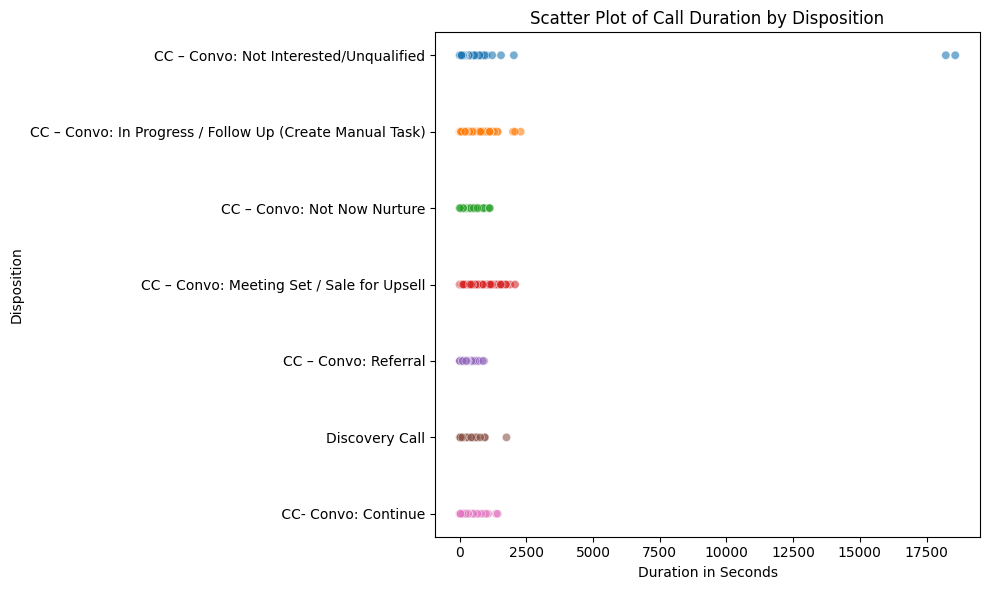

In [14]:
# Filter out rows where 'Duration in Seconds' is null or zero for meaningful analysis
df_filtered = df_call_req_cl[df_call_req_cl['Duration in Seconds'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='Duration in Seconds',
    y='Disposition',
    hue='Disposition',
    alpha=0.6,
    legend=False  # Removes the legend
)
plt.title('Scatter Plot of Call Duration by Disposition')
plt.xlabel('Duration in Seconds')
plt.ylabel('Disposition')
plt.tight_layout()
plt.show()

In [15]:
df_opportunities = pd.read_csv('/home/darshan/Documents/Vonage 2024-Nov-13/SFDC/Opp with Primary Contact.csv', encoding='latin1')

df_opportunities.info()

/tmp/ipykernel_410765/1129096593.py:1: DtypeWarning: Columns (19,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_opportunities = pd.read_csv('/home/darshan/Documents/Vonage 2024-Nov-13/SFDC/Opp with Primary Contact.csv', encoding='latin1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91181 entries, 0 to 91180
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Salesforce Instance                91181 non-null  object 
 1   Opportunity ID                     91181 non-null  object 
 2   Owner Role                         87016 non-null  object 
 3   Opportunity Owner                  91181 non-null  object 
 4   Opportunity Name                   91175 non-null  object 
 5   Account ID                         91180 non-null  object 
 6   Account Name                       91171 non-null  object 
 7   Stage                              91181 non-null  object 
 8   Fiscal Period                      91181 non-null  object 
 9   Annual Recurring Revenue Currency  89173 non-null  object 
 10  Annual Recurring Revenue           91181 non-null  float64
 11  Amount Currency                    83781 non-null  obj

In [16]:
df_opportunities_req_cl = df_opportunities[[
                            'Opportunity ID',
                            'Account ID',
                            'Contact: Email'
                        ]]
df_opportunities_req_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91181 entries, 0 to 91180
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Opportunity ID  91181 non-null  object
 1   Account ID      91180 non-null  object
 2   Contact: Email  88482 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [17]:
account_id_counts = df_opportunities_req_cl['Account ID'].value_counts()

# Display repeated Account IDs
repeated_account_ids = account_id_counts[account_id_counts > 1]
print(repeated_account_ids)


Account ID
0011O000029SHu1    35
0011400001hFGmS    21
0011O00002InRzv    11
0011O00002Cli2R    11
0011400001mC614     8
                   ..
0015Y000050ar5i     2
0014G00003BL5GN     2
0015Y00006TsjXU     2
0015Y00006TrpYq     2
0015Y00006n3n3y     2
Name: count, Length: 480, dtype: int64


In [18]:
# Count empty (null) values in 'Contact: Email' and 'Account ID'
empty_email_count = df_opportunities_req_cl['Contact: Email'].isna().sum()
empty_account_id_count = df_opportunities_req_cl['Account ID'].isna().sum()

print(f"Total empty emails: {empty_email_count}")
print(f"Total empty account IDs: {empty_account_id_count}")


Total empty emails: 2699
Total empty account IDs: 1


In [19]:
# Filter out rows where 'Contact: Email' is null
filtered_df = df_opportunities_req_cl[df_opportunities_req_cl['Contact: Email'].notna()]

# Group by 'Account ID' and find repeated 'Contact: Email'
repeated_emails = (
    filtered_df.groupby('Account ID')['Contact: Email']
    .apply(lambda x: x.duplicated(keep=False).sum())
    .reset_index(name='Repeated Email Count')
)

# Filter Account IDs where at least one email is repeated
repeated_emails_with_duplicates = repeated_emails[repeated_emails['Repeated Email Count'] > 0]

print(repeated_emails_with_duplicates)

            Account ID  Repeated Email Count
27     0011400001mCdbT                     2
28     0011400001nrCzd                     2
251    0011O000029SHu1                     2
269    0011O000029Tl6C                     2
313    0011O00002F83nn                     2
...                ...                   ...
88314  001D000002Hiwoh                     2
88333  001J5000003Gy4U                     2
88351  001J5000004a6J4                     2
88359  001a000001MM6gM                     2
88375  001cg000003yZJL                     2

[76 rows x 2 columns]


In [20]:
# Step 1: Remove rows with null 'Account ID' from the opportunities DataFrame
df_opportunities_req_cl_clean = df_opportunities_req_cl[df_opportunities_req_cl['Account ID'].notna()]

# Step 2: Create a set of unique 'Account ID's from opportunities
account_ids_opportunity = df_opportunities_req_cl_clean['Account ID'].unique()

# Step 3: Add 'Convert into Opportunity' column to df_call_req_cl
df_call_req_cl['Convert into Opportunity'] = df_call_req_cl['Account Id'].isin(account_ids_opportunity)

# Display the updated DataFrame
print(df_call_req_cl['Convert into Opportunity'].value_counts())


Convert into Opportunity
False    37213
Name: count, dtype: int64


/tmp/ipykernel_410765/3043830685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_call_req_cl['Convert into Opportunity'] = df_call_req_cl['Account Id'].isin(account_ids_opportunity)


In [27]:
# Step 1: Remove rows with null 'Contact: Email'
df_opportunities_req_cl_clean = df_opportunities_req_cl[df_opportunities_req_cl['Contact: Email'].notna()]

# Step 2: Extract the domain from the email
df_opportunities_req_cl_clean['Domain'] = df_opportunities_req_cl_clean['Contact: Email'].str.extract(r'@([\w.-]+)')

# Step 3: Count occurrences domain-wise
domain_counts = df_opportunities_req_cl_clean['Domain'].value_counts().reset_index()
domain_counts.columns = ['Domain', 'Count']

total_count = domain_counts['Count'].sum()

# Display the domain counts
print(domain_counts)
print(f"Total count for domain: {total_count}")

                        Domain  Count
0                    gmail.com  23070
1                    yahoo.com   3341
2                  outlook.com   1189
3                  hotmail.com   1181
4                      aol.com    820
...                        ...    ...
46747  thewinecommunity.com.au      1
46748            nebobcats.org      1
46749        mychildsteeth.com      1
46750        licenseprousa.com      1
46751      kreedomfreights.com      1

[46752 rows x 2 columns]
Total count for domain: 88482


/tmp/ipykernel_410765/3294146510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opportunities_req_cl_clean['Domain'] = df_opportunities_req_cl_clean['Contact: Email'].str.extract(r'@([\w.-]+)')


In [28]:
# Step 1: Remove rows with null 'Contact: Email'
df_opportunities_clean = df_opportunities[df_opportunities['Contact: Email'].notna()]

# Step 2: Extract the domain from the email
df_opportunities_clean['Domain'] = df_opportunities_clean['Contact: Email'].str.extract(r'@([\w.-]+)')

# Step 3: Filter for 'gmail.com'
gmail_data = df_opportunities_clean[df_opportunities_clean['Domain'] == 'gmail.com']

# Step 4: Count occurrences by 'Stage'
stage_counts = gmail_data['Stage'].value_counts().reset_index()
stage_counts.columns = ['Stage', 'Count']

# Step 5: Calculate the total count
total_count = stage_counts['Count'].sum()

# Display the stage counts and total count
print(stage_counts)
print(f"Total count for gmail.com: {total_count}")

                     Stage  Count
0              Closed Lost   9445
1               Closed Won   8286
2           Closed Won SSU   3466
3                 Proposal    741
4                Discovery    559
5                  Meeting    211
6                   Design    146
7        Final Negotiation    124
8                Cancelled     87
9                     Lost      2
10  FS ? Initial Discovery      1
11               Negotiate      1
12          Partner Signed      1
Total count for gmail.com: 23070


/tmp/ipykernel_410765/698881396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opportunities_clean['Domain'] = df_opportunities_clean['Contact: Email'].str.extract(r'@([\w.-]+)')


In [30]:
df_opportunities['Account ID'].nunique()

90535